# Group Lemmatizers:
## Cadets Coston, Nordby, and Beckman

# Topic Modeling Assessment Project

Welcome to your Topic Modeling Assessment! For this project you will be working with a dataset of over 400,000 quora questions that have no labeled cateogry, and attempting to find 20 cateogries to assign these questions to. The .csv file of these text questions can be found underneath the Topic-Modeling folder.

Remember you can always check the solutions notebook and video lecture for any questions.

#### Task: Import pandas and read in the quora_questions.csv file.

In [4]:
!pip install nltk spacy

  Using cached spacy-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached preshed-3.0.9-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
  Using cached thinc-8.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-

In [7]:
!spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [8]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.util import ngrams
import nltk
nltk.download('wordnet')
import spacy
spacy.load('en_core_web_lg')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
df = pd.read_csv(r"train.csv")
df.drop(columns = [col for col in df.columns if col!='question1'],inplace=True)
df.question1 = df.question1.astype(str)
df.columns = ['Question']
df.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


# Preprocessing

#### Task: Use TF-IDF Vectorization to create a vectorized document term matrix. You may want to explore the max_df and min_df parameters.

In [48]:
lemmatizer = WordNetLemmatizer()

nlp = spacy.load('en_core_web_lg')
stop_words = nlp.Defaults.stop_words
    
def preprocess(text):
    tokens = text.split()
    return ' '.join([lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words])

df['preprocessed_question'] = df['Question'].apply(lambda text: preprocess(text))

In [49]:
vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, stop_words='english')
X = vectorizer.fit_transform(df['preprocessed_question'].fillna(''))

In [50]:
df.head()

,Question,preprocessed_question
0,What is the step by step guide to invest in sh...,step step guide invest share market india?
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,story kohinoor (koh-i-noor) diamond?
2,How can I increase the speed of my internet co...,increase speed internet connection vpn?
3,Why am I mentally very lonely? How can I solve...,mentally lonely? solve it?
4,"Which one dissolve in water quikly sugar, salt...","dissolve water quikly sugar, salt, methane car..."


# Non-negative Matrix Factorization

#### TASK: Using Scikit-Learn create an instance of NMF with 20 expected components. (Use random_state=42)..

In [45]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=20, random_state=42)

nmf.fit(X)

NMF(n_components=20, random_state=42)

#### TASK: Print our the top 15 most common words for each of the 20 topics.

In [46]:
words = vectorizer.get_feature_names_out()
for i, component in enumerate(nmf.components_):
    ordered = sorted(component, reverse=True)
    print(f'Topic {i + 1}')
    top_words = []
    for word_index, num in enumerate(component):
        if num in ordered[:15]:
            top_words.append(words[word_index])
    print(top_words)

Topic 1
['2016', 'best', 'book', 'buy', 'company', 'friend', 'laptop', 'movie', 'movies', 'phone', 'place', 'read', 'site', 'visit', 'website']
Topic 2
['add', 'answer', 'answered', 'ask', 'asked', 'delete', 'easily', 'google', 'improvement', 'marked', 'needing', 'post', 'question', 'quora', 'search']
Topic 3
['black', 'earn', 'easily', 'easy', 'facebook', 'free', 'home', 'internet', 'investment', 'job', 'making', 'money', 'online', 'website', 'youtube']
Topic 4
['balance', 'change', 'changed', 'death', 'earth', 'important', 'life', 'live', 'meaning', 'moment', 'purpose', 'real', 'thing', 'want', 'work']
Topic 5
['2016', 'america', 'better', 'clinton', 'donald', 'election', 'happen', 'hillary', 'presidency', 'president', 'presidential', 'think', 'trump', 'vote', 'win']
Topic 6
['culture', 'don', 'feel', 'friend', 'girl', 'guy', 'like', 'live', 'look', 'men', 'sex', 'tell', 'website', 'woman', 'work']
Topic 7
['beginner', 'book', 'coding', 'computer', 'english', 'hacking', 'java', 'lang

#### TASK: Add a new column to the original quora dataframe that labels each question into one of the 20 topic categories.

In [29]:
topic_distribution = nmf.transform(X)

df['topic'] = topic_distribution.argmax(axis=1)

In [30]:
df.head()

,Question,preprocessed_question,topic
0,What is the step by step guide to invest in sh...,step step guide invest share market india?,7
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,story kohinoor (koh-i-noor) diamond?,14
2,How can I increase the speed of my internet co...,increase speed internet connection vpn?,9
3,Why am I mentally very lonely? How can I solve...,mentally lonely? solve it?,12
4,"Which one dissolve in water quikly sugar, salt...","dissolve water quikly sugar, salt, methane car...",16


# Alternative Methods of Grouping
K-means and LDA

In [35]:
from sklearn.cluster import KMeans

def cluster_and_filter_relevance(df, n_clusters=5, n_key_words=10):
    """
    Perform K-means clustering on the articles' abstracts and filter the most relevant clusters with lemmatization.
    USes TF-IDF to vectorize the documents and K-means to cluster them into groups
    
    :param df: DataFrame containing the articles data.
    :param n_clusters: Number of clusters to create.
    :param n_key_words: Number of top keywords to use for filtering relevant clusters.
    
    :return: Filtered DataFrame with relevant clusters, and a dictionary containing cluster keywords.
    """
    # Vectorize the text data
    # max_df: if a word is contianed in 95% of documents it is discarded
    # min_df: if a word is only contained in 2 or less documents it is discarded
    vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words='english')
    X = vectorizer.fit_transform(df['preprocessed_question'].fillna(''))

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    df['K_Means_Cluster'] = kmeans.labels_
    cluster_keywords = {}
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for i in range(n_clusters):
        cluster_keywords[i] = [terms[ind] for ind in order_centroids[i, :n_key_words]]
    
    df_filtered = df.copy()  
    return df_filtered, cluster_keywords

df_k_means, clusters_k_means = cluster_and_filter_relevance(df, 20, 10)

for group in sorted(clusters_k_means.keys()):
    print(f'cluster_k_means {group} keywords: {clusters_k_means[group]}')

print("\nCluster counts:")
print(df_k_means['K_Means_Cluster'].value_counts().sort_index())

cluster_k_means 0 keywords: ['mean', 'love', 'fall', 'girl', 'person', 'say', 'guy', 'dream', 'friend', 'true']
cluster_k_means 1 keywords: ['long', 'distance', 'relationship', 'work', 'term', 'stay', 'time', 'successful', 'meth', 'learn']
cluster_k_means 2 keywords: ['life', 'purpose', 'thing', 'meaning', 'important', 'real', 'best', 'moment', 'balance', 'departments']
cluster_k_means 3 keywords: ['best', 'book', 'movie', 'place', 'learn', 'laptop', '2016', 'site', 'language', 'programming']
cluster_k_means 4 keywords: ['sex', 'feel', 'time', 'woman', 'like', 'having', 'anal', 'important', 'girl', 'relationship']
cluster_k_means 5 keywords: ['good', 'difference', 'time', 'trump', 'learn', 'english', 'world', 'indian', 'use', 'thing']
cluster_k_means 6 keywords: ['people', 'think', 'hate', 'believe', 'flat', 'don', 'like', 'world', 'love', 'trump']
cluster_k_means 7 keywords: ['like', 'feel', 'look', 'girl', 'culture', 'work', 'live', 'guy', 'woman', 'corporate']
cluster_k_means 8 keyw

In [36]:
df.head()

,Question,preprocessed_question,topic,K_Means_Cluster
0,What is the step by step guide to invest in sh...,step step guide invest share market india?,7,9
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,story kohinoor (koh-i-noor) diamond?,14,5
2,How can I increase the speed of my internet co...,increase speed internet connection vpn?,9,5
3,Why am I mentally very lonely? How can I solve...,mentally lonely? solve it?,12,5
4,"Which one dissolve in water quikly sugar, salt...","dissolve water quikly sugar, salt, methane car...",16,5


In [ ]:
# LDA (takes a long time)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


# Use CountVectorizer to convert the text data into a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['preprocessed_question'])

# Define the LDA model with the number of topics you want to extract
num_topics = 20  # You can adjust this number
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Get the topic distribution for each document
doc_topic_dist = lda.transform(X)

# Reduce the dimensionality of the topics for visualization using t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
tsne_lda = tsne_model.fit_transform(doc_topic_dist)

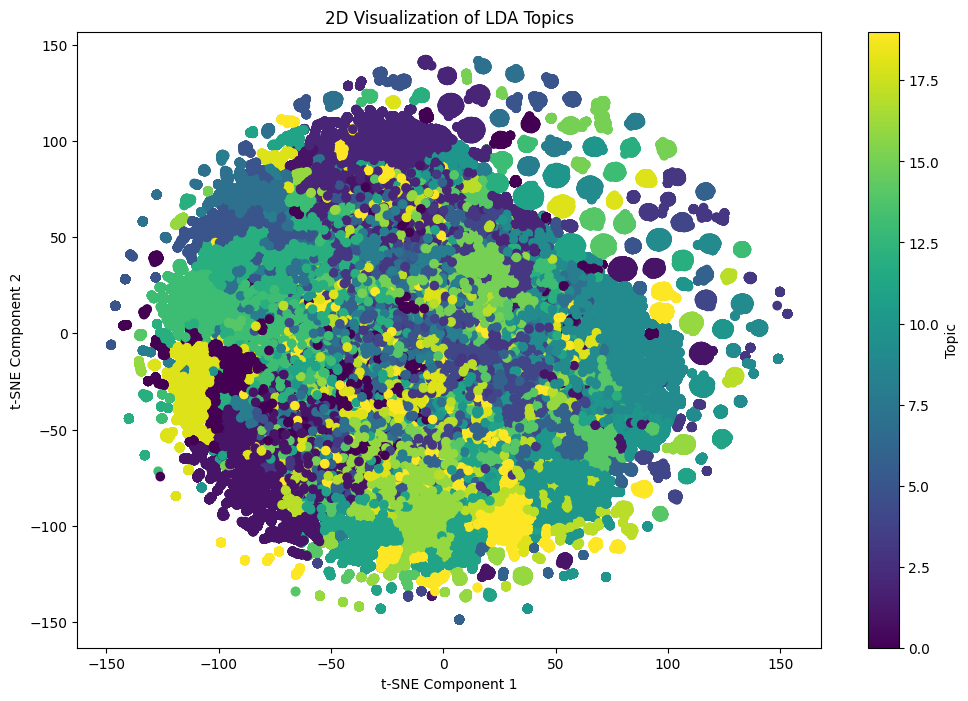

Topic #1: people, bad, think, meaning, white, american, chinese, like, die, hate
Topic #2: way, best, feel, sex, stop, like, eat, rid, food, good
Topic #3: best, movie, buy, free, laptop, app, 2016, india, pro, song
Topic #4: account, change, different, energy, average, bank, culture, big, universe, hack
Topic #5: business, start, country, india, state, idea, like, united, startup, company
Topic #6: india, 500, 1000, note, black, rupee, government, money, pakistan, real
Topic #7: favorite, time, home, major, looking, form, theory, hour, day, famous
Topic #8: place, best, don, facebook, know, visit, effect, hair, whatsapp, instagram
Topic #9: time, possible, example, human, increase, travel, light, story, speed, living
Topic #10: best, engineering, student, college, study, good, university, science, computer, exam
Topic #11: best, learn, book, language, programming, good, website, read, way, learning
Topic #12: life, thing, know, day, love, new, woman, going, men, marketing
Topic #13: w

In [40]:
import matplotlib.pyplot as plt
# Plot the topics in a 2D space
plt.figure(figsize=(12, 8))
plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=doc_topic_dist.argmax(axis=1), cmap='viridis')
plt.colorbar(label='Topic')
plt.title('2D Visualization of LDA Topics')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Display the top words in each topic
num_top_words = 10  # Number of top words to display for each topic
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")